# Causal Inference for the True and Brave

> https://matheusfacure.github.io/python-causality-handbook/landing-page.html

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

## 1. Introduction

- association = ATT + bias 

In [ ]:
from scipy.special import expit

In [4]:
n = 100
tuition = np.random.normal(1000, 300, n)
tuition_norm = (tuition - tuition.mean()) / tuition.std()
probs = expit(tuition_norm)  # probability that school gives tables as function of tuition
tablet = np.random.binomial(1, probs).astype(bool)
enem_score = np.random.normal(200 - 50*tablet + 0.7 * tuition, 200)
enem_score = 1000 * ((enem_score - enem_score.min()) / enem_score.max())

data = pd.DataFrame(dict(enem_score=enem_score, tablet=tablet, tuition=tuition))

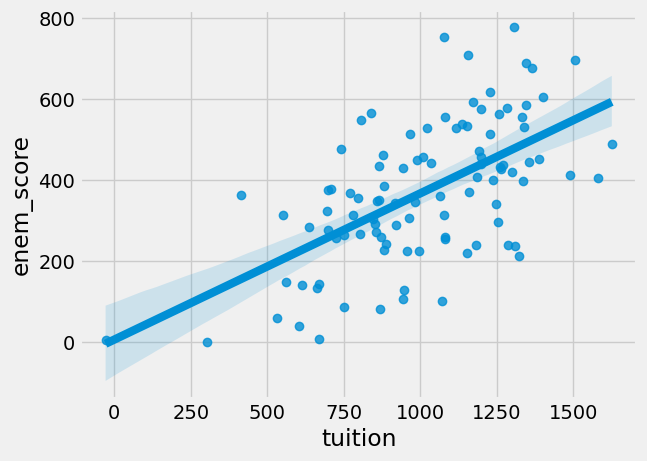

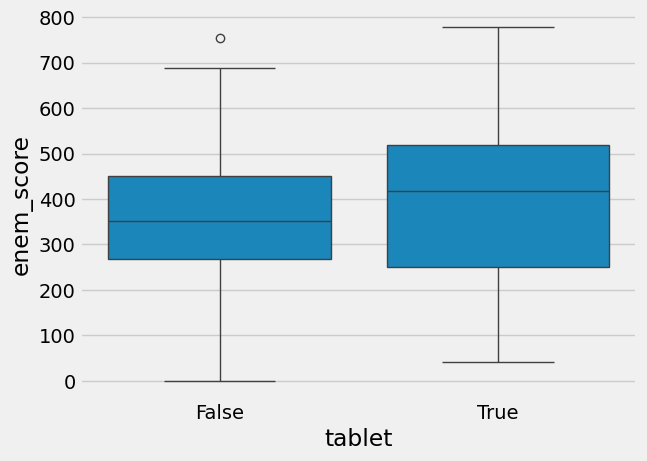

In [5]:
sns.regplot(data=data, x='tuition', y='enem_score')
plt.show()
sns.boxplot(data=data, x='tablet', y='enem_score')
plt.show()

## 2. Randomised Experiments

In [8]:
df = pd.read_csv('../../data/online_classroom.csv')
df.describe()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
count,323.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,323.000000,323.000000,323.000000
mean,0.578947,0.214575,0.068826,0.012146,0.016194,0.004049,0.684211,0.291022,0.337461,76.627336
std,0.494494,0.411361,0.253672,0.109759,0.126479,0.063628,0.465773,0.454938,0.473577,11.665256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.015000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,78.330000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,84.990000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.680000


### Causal effect of online format

In [9]:
(
    df
    .assign(class_format=np.select(
        [df.format_ol.astype(bool), df.format_blended.astype(bool)],
        ['online', 'blended'],
        default="face_to_face"
    ))
    .groupby('class_format')
    .mean()
)

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
class_format,,,,,,,,,,
blended,0.550459,0.217949,0.102564,0.025641,0.012821,0.012821,0.628205,0.0,1.0,77.093731
face_to_face,0.633333,0.202020,0.070707,0.000000,0.010101,0.000000,0.717172,0.0,0.0,78.547485
online,0.542553,0.228571,0.028571,0.014286,0.028571,0.000000,0.700000,1.0,0.0,73.635263
